<h1>ESC50 Environment Sound Classification</h1>
<p>(Continuation)</p>
<p>uploaded both train data and label data to drive,now use it</p>

In [2]:
#import modules
import numpy as np
import pandas as pd
import os
import sys
import warnings
import math
import matplotlib
from matplotlib import pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
from PIL import Image
from keras.preprocessing.image import img_to_array,array_to_img
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D,Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.constraints import maxnorm
import IPython.display as ipd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Ytrain_esc50.npy to Ytrain_esc50.npy


In [ ]:
!ls

drive  sample_data


In [ ]:
cd '/content/drive'

/content/drive


In [3]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [4]:
xtrain=np.load('Xtrain_esc50.npy')

In [5]:
xtrain.shape

(2000, 75, 155, 3)

In [6]:
ytrain=np.load('Ytrain_esc50.npy')

In [7]:
label_count=ytrain.shape[1]
label_count

50

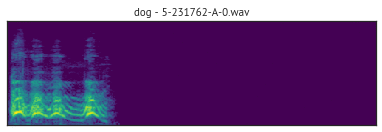

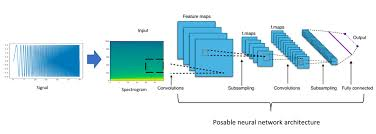

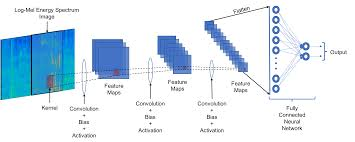

<h2>pure CNN model</h2>
<ul><li>increasing 4 layer architecture</li>
<li>with minimum dropouts</li>
<li>Activation Function :Rectifier Linear Unit(ReLU)</li>
<li>Loss: Categorical Cross Entropy</li>
<li>Optimizer: Adam</li>
<li>no early stopping</li>
<li>epochs: 150</li>

In [ ]:
def return_pure_cnnModel():
    model=Sequential()
    model.add(Convolution2D(16,(3,3),input_shape=(75,155,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(label_count,(1,1)))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
    return model

In [ ]:
model=return_pure_cnnModel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 73, 153, 16)       448       
_________________________________________________________________
dropout_9 (Dropout)          (None, 73, 153, 16)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 151, 32)       4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 33, 73, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 33, 73, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 71, 128)      

<h4>train validation split:- <strong>17:3</strong><h4>

In [ ]:
model.fit(x=xtrain[:1700],y=ytrain[:1700],validation_data=(xtrain[1700:],ytrain[1700:]),epochs=150)

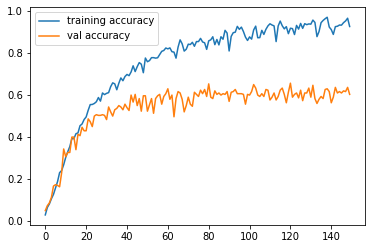

In [34]:
training_data=model.history.history
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

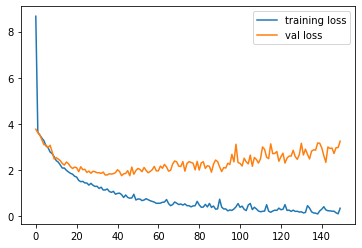

In [35]:
plt.plot(training_data['loss'],label='training loss')
plt.plot(training_data['val_loss'],label='val loss')
plt.legend(loc='best')

In [36]:
print(f'training accuracy : {np.max(training_data["accuracy"])*100}%')
print(f'validation accuracy : {np.max(training_data["val_accuracy"])*100}%')

training accuracy : 97.0588207244873%
validation accuracy : 65.66666960716248%


<h2>pure CNN model</h2>
<ul><li>increasing 4 layer architecture with initial 32 filters</li>
<li>with increasing dropout rate</li>
<li>Activation Function :Rectifier Linear Unit(ReLU)</li>
<li>Loss: Categorical Cross Entropy</li>
<li>Optimizer: Adam</li>
<li>no early stopping</li>
<li>epochs: 100</li>

In [ ]:
def return_pure_cnnModel1():
    model=Sequential()
    model.add(Convolution2D(32,(3,3),input_shape=(75,155,3),activation='relu'))
    model.add(Dropout(0.3))
    model.add(Convolution2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Convolution2D(label_count,(1,1)))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
    return model

In [ ]:
model1=return_pure_cnnModel1()
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 73, 153, 32)       896       
_________________________________________________________________
dropout_18 (Dropout)         (None, 73, 153, 32)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 71, 151, 32)       9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 75, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 33, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 36, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 36, 64)       

<h4>train validation split:- <strong>17:3</strong><h4>

In [ ]:
model1.fit(x=xtrain[:1700],y=ytrain[:1700],validation_data=(xtrain[1700:],ytrain[1700:]),epochs=100)

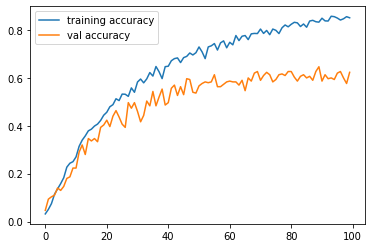

In [ ]:
training_data=model1.history.history
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

In [ ]:
print(f'training accuracy : {np.max(training_data["accuracy"])*100}%')
print(f'validation accuracy : {np.max(training_data["val_accuracy"])*100}%')

training accuracy : 85.76470613479614%
validation accuracy : 64.66666460037231%


In [ ]:
model.fit(x=xtrain[:1700],y=ytrain[:1700],validation_data=(xtrain[1700:],ytrain[1700:]),epochs=100)

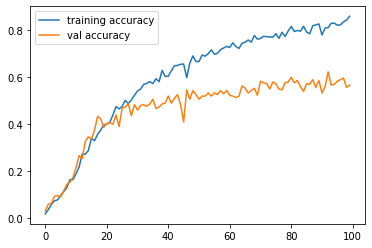

In [ ]:
training_data=model.history.history
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

In [ ]:
print(f'training accuracy : {np.max(training_data["accuracy"])*100}%')
print(f'validation accuracy : {np.max(training_data["val_accuracy"])*100}%')

training accuracy : 86.00000143051147%
validation accuracy : 62.33333349227905%


<h2>pure CNN model</h2>
<ul><li>increasing 8 layer architecture with initial double 16 filter layers</li>
<li>with increasing dropout rate</li>
<li>Activation Function :Rectifier Linear Unit(ReLU)</li>
<li>Loss: Categorical Cross Entropy</li>
<li>Optimizer: RMSProp</li>
<li>no early stopping</li>
<li>epochs: 100</li>

In [17]:
def return_pure8cnn():
  model=Sequential()
  model.add(Convolution2D(16,(3,3),padding='same',activation='relu',input_shape=(75,155,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(16,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.3))

  model.add(Convolution2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(32,(3,3),padding='same',activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.4))

  model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.3))

  model.add(Convolution2D(128,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(128,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.4))
  model.add(Convolution2D(label_count,(1,1)))
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  model.compile(loss= 'categorical_crossentropy', optimizer = 'RMSProp', metrics= ['accuracy'])

  return model

In [18]:
model=return_pure8cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 75, 155, 16)       448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 77, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 37, 77, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 18, 38, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 18, 38, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 38, 32)        4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 19, 32)        

In [19]:
model.fit(x=xtrain[:1700],y=ytrain[:1700],validation_data=(xtrain[1700:],ytrain[1700:]),epochs=100)

Epoch 1/100
54/54 [==============================] - 1s 16ms/step - loss: 4.3272 - accuracy: 0.0182 - val_loss: 3.9097 - val_accuracy: 0.0133
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 3.8659 - accuracy: 0.0335 - val_loss: 3.8631 - val_accuracy: 0.0500
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 3.6727 - accuracy: 0.0471 - val_loss: 3.6174 - val_accuracy: 0.0767
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 3.4442 - accuracy: 0.0900 - val_loss: 3.6156 - val_accuracy: 0.0633
Epoch 5/100
54/54 [==============================] - 1s 11ms/step - loss: 3.1966 - accuracy: 0.1418 - val_loss: 3.2278 - val_accuracy: 0.1667
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 2.9035 - accuracy: 0.1971 - val_loss: 3.1969 - val_accuracy: 0.1867
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 2.7129 - accuracy: 0.2353 - val_loss: 3.0988 - val_accuracy: 0.1400
Epoch 

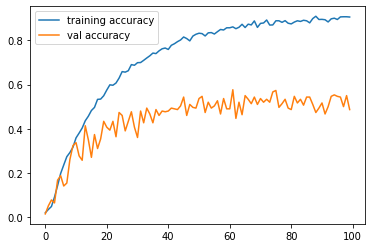

In [20]:
training_data=model.history.history
plt.plot(training_data['accuracy'],label='training accuracy')
plt.plot(training_data['val_accuracy'],label='val accuracy')
plt.legend(loc='best')

In [21]:
print(f'training accuracy : {np.max(training_data["accuracy"])*100}%')
print(f'validation accuracy : {np.max(training_data["val_accuracy"])*100}%')

training accuracy : 91.00000262260437%
validation accuracy : 57.66666531562805%
